<a href="https://colab.research.google.com/github/kejenyun/Day77_Scikitlearn_Regression/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [6]:
print(f'Is there any NaN data values present? : {data.isna().values.any()}')

Is there any NaN data values present? : False


In [7]:
print(f'Is there any duplicate rows? : {data.duplicated().values.any()}')

Is there any duplicate rows? : False


In [8]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
char_to_remove = [',','$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
for col in columns_to_clean:
  for char in char_to_remove:
    data[col] = data[col].astype(str).str.replace(char,"")
  data[col]=pd.to_numeric(data[col])

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
data['Release_Date']= pd.to_datetime(data['Release_Date'])

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [13]:
print("average productcion budget: 31M")
print('average worldwide gross revenue of films: 88.8M')
print('minimums for worldwide and domestic revenue? 0')
print('the bottom 25% of films actually profitable or do they lose money? losing money')
print('the highest production budget and highest worldwide gross revenue of any film? 425M & 2.7B')
print('How much revenue did the lowest and highest budget films make? ')

average productcion budget: 31M
average worldwide gross revenue of films: 88.8M
minimums for worldwide and domestic revenue? 0
the bottom 25% of films actually profitable or do they lose money? losing money
the highest production budget and highest worldwide gross revenue of any film? 425M & 2.7B
How much revenue did the lowest and highest budget films make? 


In [14]:
#How much revenue did the lowest and highest budget films make?
data[data['USD_Production_Budget'] == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [15]:
data[data.USD_Production_Budget ==425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [16]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget',ascending =False)

Number of films grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [17]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films grossed $0 worldwide: {len(zero_worldwide)}')

zero_domestic.sort_values('USD_Production_Budget', ascending =False)

Number of films grossed $0 worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [18]:
# create a filter for these two conditions
# which films made money internationally but 0 revenue in US domestic
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()
                              

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


Why does this work? Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas! 

bool_list1 = [True, True, False, False]
Bool_list2 = [False, True, True, False]

np.array(bool_list1) & np.array(bool_list2)

output: array([False, True, False, False])

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [20]:
international_releases = data.query('USD_Worldwide_Gross != 0' and 'USD_Domestic_Gross ==0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [22]:
future_films = data[data.Release_Date >= scrape_date]
print(f'Number of films were not screened in the box office before May 1st 2018: {len(future_films)}')
future_films

Number of films were not ecreened in the box office before May 1st 2018: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [24]:
#drop the non-released ones
data_clean = data.drop(future_films.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [25]:
losers = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(losers)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

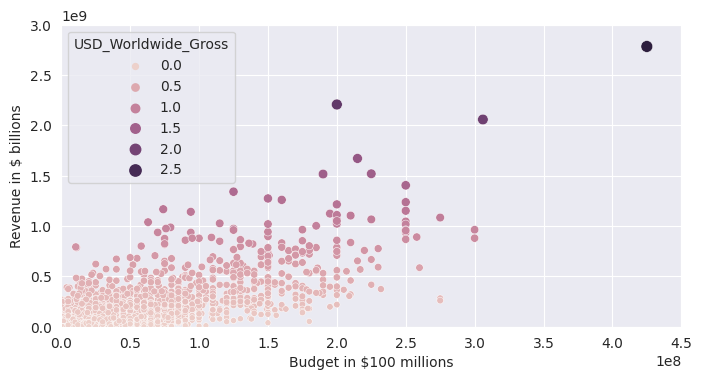

In [47]:
plt.figure(figsize =(8,4), dpi=100)

#set styling on a single chart In addition to 'darkgrid', Seaborn has a number of built-in themes. 
#so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

with sns.axes_style('darkgrid'):
  ax= sns.scatterplot(data=data_clean, 
                  x= 'USD_Production_Budget',
                  y= 'USD_Worldwide_Gross',
                  hue = 'USD_Worldwide_Gross', #color
                  size= 'USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



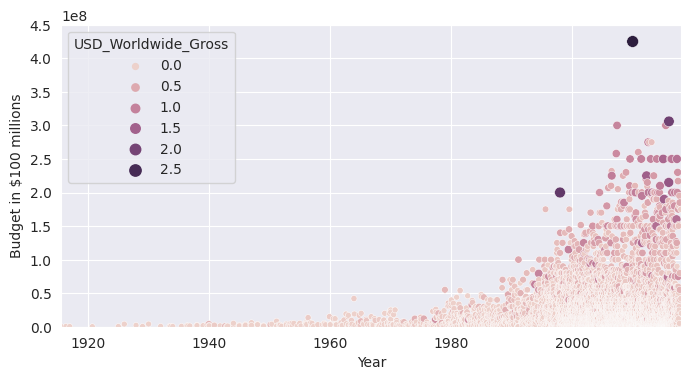

In [52]:
#THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. 
plt.figure(figsize =(8,4), dpi=100)


with sns.axes_style('darkgrid'):
  ax= sns.scatterplot(data=data_clean, 
                  x= 'Release_Date',
                  y= 'USD_Production_Budget',
                  hue = 'USD_Worldwide_Gross', #color
                  size= 'USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 450000000),
        xlim=(data_clean.Release_Date.min(),data_clean.Release_Date.max()),
        xlabel='Year',
        ylabel='Budget in $100 millions')

plt.show()


Analysis
1. Budget budget exploed in the last 40 years starting in 1970s.
2. Budget start growing fast (slop) from 1980 onwards
3. Industry also has grown massively, producing more films than before. (overlapping dots)

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [54]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
year = dt_index.year
decades = year//10*10
data_clean['Decade'] =decades

data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [62]:
old_films = data_clean[data_clean.Decade <1970]
new_films = data_clean[data_clean.Decade >= 1970]

print(f"How many films were released prior to 1970? {len(old_films)}")

How many films were released prior to 1970? 153


In [63]:
#What was the most expensive film made prior to 1970?
old_films.sort_values ('USD_Production_Budget', ascending = False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

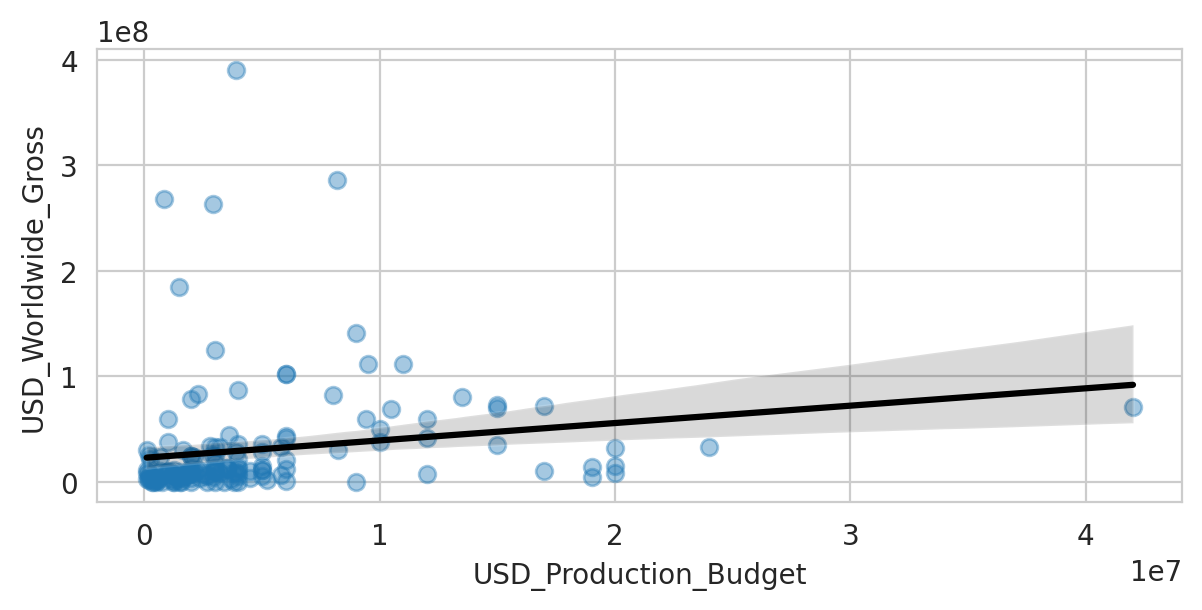

In [67]:
plt.figure(figsize=(7,3), dpi=200)

with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y= 'USD_Worldwide_Gross',
            scatter_kws = {'alpha':0.4},
            line_kws = {'color':'black'})


Observation: Many lower budget films are making much more revenue.
The relatnship between revenue & budget is not very strong. Many points on the left are very far away from the line.

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

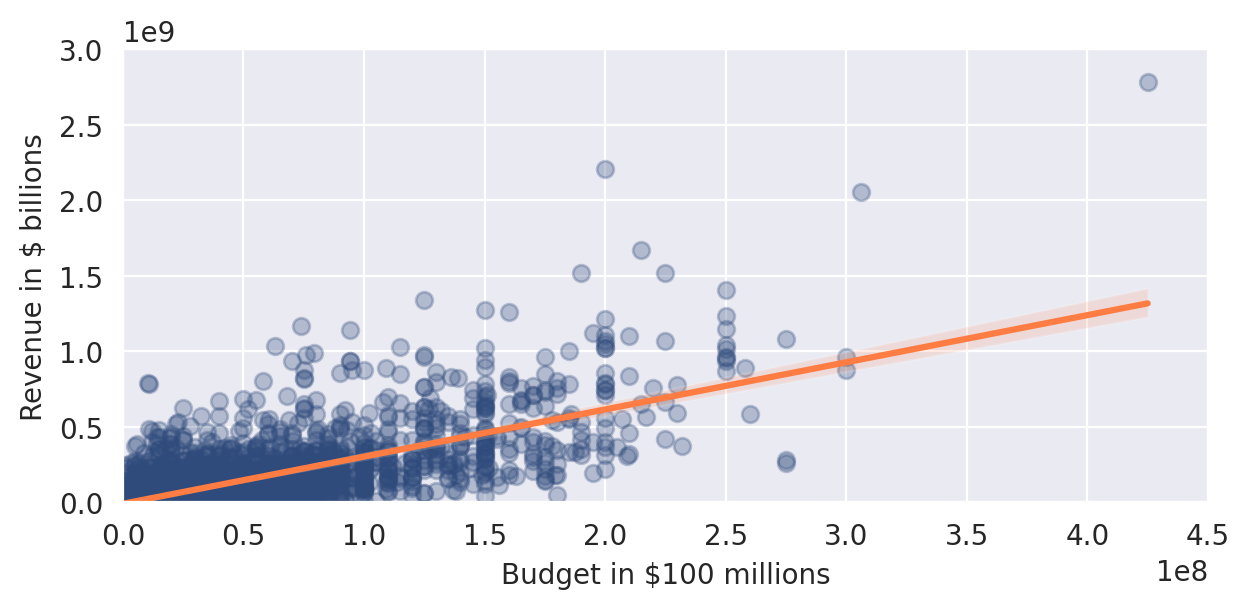

In [71]:
plt.figure(figsize=(7,3), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget',
            y= 'USD_Worldwide_Gross',
            color = '#2f4b7c',
            scatter_kws = {'alpha':0.3},
            line_kws = {'color':'#ff7c43'})
  
  ax.set(xlim=(0, 450000000),
        ylim=(0, 3000000000),
        xlabel='Budget in $100 millions',
        ylabel= "Revenue in $ billions" )

Observation: Much better fit. Our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. 

A film with a 150 million budget is predicted to make slightly under $500 million by our regression line.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

In [86]:
from sklearn.linear_model import LinearRegression

In [88]:
regression =LinearRegression()

In [90]:
#Explanatory Variable(s) or Features
x = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

#find the best fit line
regression.fit(x,y)

#theta Zero 
regression.intercept_

array([-8650768.00661027])

In [92]:
#theta one
regression.coef_

array([[3.12259592]])

In [93]:
#R-squared
regression.score(x,y) 

# the modle explains about 56% of the variance in movie revenue.

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [99]:
#Explanatory Variable(s) or Features
x = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

#find the best fit line
regression.fit(x,y)

#theta Zero 
print(f"The sope coefficient is {regression.coef_[0]}")
print(f"The intercept is: {regression.intercept_[0]}")
print(f" The r-squared is: {regression.score(x,y)}")


The sope coefficient is [1.64771314]
The intercept is: 22821538.635080386
 The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [101]:
22821538+1.64771314*3500000000

5789817528.0

In [103]:
#or
budget =3500000000
revenue_estimate = regression.intercept_[0]+regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print (f'The estimated revenue for a $350M film is around ${revenue_estimate}.')

The estimated revenue for a $350M film is around $5790000000.0.


**Summary**

Use nested loops to remove unwanted characters from multiple columns

Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

Create bubble charts using the Seaborn Library

Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

Use floor division (i.e., integer division) to convert years to decades

Use Seaborn to superimpose a linear regressions over our data

Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

Run regressions with scikit-learn and calculate the coefficients.

